In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# Read data and basic checks for number of records and missing vallues

In [2]:
df=pd.read_csv('menu_info.csv')

In [3]:
df.head()

,Dish_name,Restaurant,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
print('Info \n')
df.info()
print('\n NAs \n')
df.isna().sum()
print('\n Unique Values \n')
df.nunique()

Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dish_name             158 non-null    object 
 1   Restaurant            158 non-null    object 
 2   Preparation_duration  158 non-null    int64  
 3   Price                 158 non-null    float64
 4   Consumption_duration  158 non-null    float64
 5   Serving_duration      158 non-null    float64
 6   Waiting_duration      158 non-null    float64
 7   Spice_density         158 non-null    float64
 8   Personnel_needed      158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB

 NAs 


 Unique Values 



Dish_name               138
Restaurant               20
Preparation_duration     31
Price                    94
Consumption_duration    104
Serving_duration         80
Waiting_duration         98
Spice_density           109
Personnel_needed         91
dtype: int64

# Basic stats and visualizations to understand the data

In [5]:
df.describe()

,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


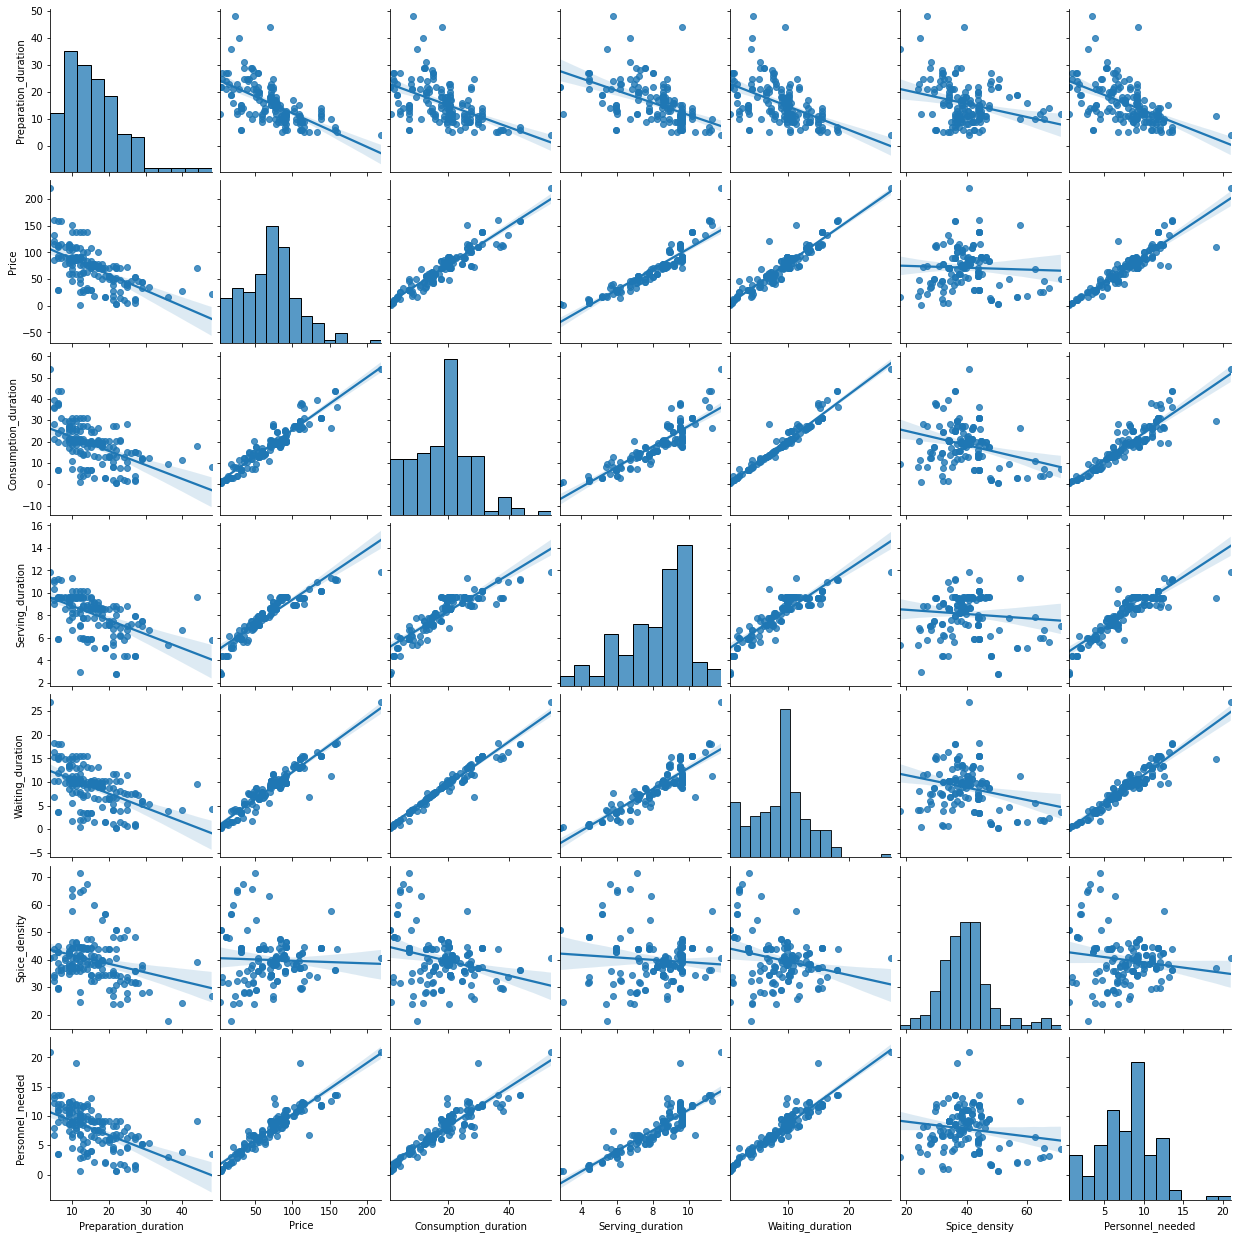

In [6]:
sns.pairplot(df, kind='reg')

<AxesSubplot:>

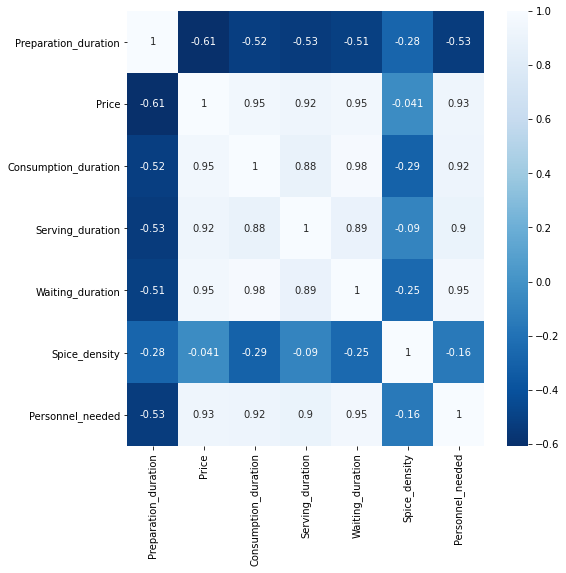

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues_r')

# Decisions regarding the columns to be included in the model

Based on the visualizations above and some logic on what would actually help in predicting the personnel_needed for a dish we decided to exclude the following colums:

1. Dish_name -  Since we have a relatively small dataset and most of the dishes seem to be unique we will exclude this column to lower complexity
2. Spice_density - This feature both from a busniess logic aspect as well as data doesn't seem like it will be particularly important for us

In [8]:
df.drop(['Dish_name', 'Spice_density'], axis=1, inplace=True)

# Modeling

In [9]:
### handle the Restaurant column
ohe=OneHotEncoder()
X = ohe.fit_transform(
    df['Restaurant'].values.reshape(-1,1)).toarray()
dfonehot = pd.DataFrame(X)
df = pd.concat([df.drop('Restaurant', axis=1), dfonehot], axis =1)

In [10]:
df

,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Personnel_needed,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,6,30.277,6.94,5.94,3.55,3.55,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,30.277,6.94,5.94,3.55,3.55,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,47.262,14.86,7.22,7.43,6.70,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,110.000,29.74,9.53,14.88,19.10,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,101.353,26.42,8.92,13.21,10.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,0.59,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
154,14,76.800,19.60,8.79,9.67,12.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,25,5.350,1.58,4.40,0.74,0.88,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156,27,5.350,1.67,4.40,0.74,0.88,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
### Split the data into training and test sets
X=df.drop(['Personnel_needed'], axis=1)
y=df['Personnel_needed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
### train the model and make predictions
lm=LinearRegression()
lm.fit(X_train, y_train)
lmpredictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

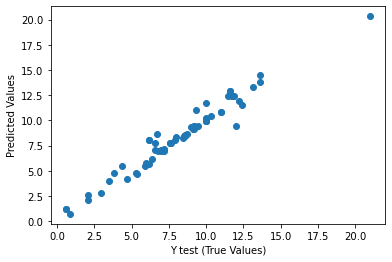

In [13]:
### plot our predicted values agains the true values
plt.scatter(y_test, lmpredictions)
plt.xlabel('Y test (True Values)')
plt.ylabel('Predicted Values')

Plotting the Predicted Values vs the True Values we get almost a straight line, which means the model is doing a good job. In, other words we don't have a bias (underfitting) or a variance (overfitting) issues.

In [14]:
### show the coefficients for the independent variables
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])
cdf

,Coefficient
Preparation_duration,3.040811e-03
Price,2.433918e-02
Consumption_duration,-6.731871e-02
Serving_duration,3.451782e-01
Waiting_duration,6.042733e-01
0,-2.114617e-01
1,6.295044e-01
2,5.771737e-01
3,-5.431145e-01
4,-8.765052e-02


In [15]:
### calculate the MSE and R2 of the model
print('MSE', mean_squared_error(y_test, lmpredictions))
print('R2', r2_score(y_test, lmpredictions))

MSE 0.5922401309094836
R2 0.9531249015479449


Regularization is the concept of imposing some restrictions in the equation in order to avoid overfitting to the training data. We generally impose a penalty to the coefficients we get from the model. The more complex/flexible the model gets the higher the coefficients it computes will be. With regularization we introduce a new element in the equation that works on lowering the coefficients.

In [44]:
### Check to see if regularization would help us improve the model

#l1
lasso=Lasso(alpha=5)
lasso.fit(X_train, y_train)
print('Lasso: ', lasso.score(X_test, y_test))

#l2
ridge=Ridge(alpha=5)
ridge.fit(X_train, y_train)
print('Ridge: ',ridge.score(X_test, y_test))

Lasso:  0.8717579065725718
Ridge:  0.9513519991391978


The plain Linear Regression model seems to be doing a very good job on this simple dataset. We might get some more accuracy if we play around with the Ridge regression (we tested it out) but the improvment is not significant, thus it's best if we stay with the plain regression.